## Lab 3: Cleaning and Analysis of Books Dataset


# Table of Contents 
<ol start="1">
<li> Loading and Cleaning with Pandas</li>
<li> Asking Questions?  </li>
<li> Parsing and Completing the Dataframe  </li>
<li> Determining the Best Books  </li>
<li>Trends in Popularity of Genres </li>
</ol>


## Part 1: Loading and Cleaning with Pandas 
Read in the `goodreads.csv` file, examine the data, and do any necessary data cleaning. 

Here is a description of the columns (in order) present in this csv file:

```
rating: the average rating on a 1-5 scale achieved by the book
review_count: the number of Goodreads users who reviewed this book
isbn: the ISBN code for the book
booktype: an internal Goodreads identifier for the book
author_url: the Goodreads (relative) URL for the author of the book
year: the year the book was published
genre_urls: a string with '|' separated relative URLS of Goodreads genre pages
dir: a directory identifier internal to the scraping code
rating_count: the number of ratings for this book (this is different from the number of reviews)
name: the name of the book
```

Load the appropriate libraries

In [1]:
#write your solution here
import pandas as pd

### Cleaning: Reading in the data
We read in and clean the data from `goodreads.csv`.  Try directly loading the data from file and see what the dataframe look like. What's the problem with naively loading the data as is? You might want to open the CSV file in Excel or your favorite text editor to see how this dataset is formatted.

In [2]:
#Read the data into a dataframe
#Inser your code
df = pd.read_csv("/Users/sangaykhandu/Desktop/Semester 6/ITS307/data/goodreads.csv")

#Examine the first couple of rows of the dataframe
####### 
#   Insert your code
####### 
df.head()


4.40 136455  0439023483  good_reads:book  \
0  4.41  16648  0439358078  good_reads:book   
1  3.56  85746  0316015849  good_reads:book   
2  4.23  47906  0061120081  good_reads:book   
3  4.23  34772  0679783261  good_reads:book   
4  4.25  12363  0446675539  good_reads:book   

  https://www.goodreads.com/author/show/153394.Suzanne_Collins    2008  \
0  https://www.goodreads.com/author/show/1077326....            2003.0   
1  https://www.goodreads.com/author/show/941441.S...            2005.0   
2  https://www.goodreads.com/author/show/1825.Har...            1960.0   
3  https://www.goodreads.com/author/show/1265.Jan...            1813.0   
4  https://www.goodreads.com/author/show/11081.Ma...            1936.0   

  /genres/young-adult|/genres/science-fiction|/genres/dystopia|/genres/fantasy|/genres/science-fiction|/genres/romance|/genres/adventure|/genres/book-club|/genres/young-adult|/genres/teen|/genres/apocalyptic|/genres/post-apocalyptic|/genres/action  \
0  /genres/fantasy|/genres/young-adult|/genres/fi...                                                                                                                                                                                                      
1  /genres/young-adult|/genres/fantasy|/genres/ro...                                                                                                                                                                                                      
2  /genres/classics|/genres/fiction|/genres/histo...                                                                                                                                                                                                      
3  /genres/classics|/genres/fiction|/genres/roman...                                                                                                                                                                                                      
4  /genres/classics|/genres/historical-fiction|/g...                                                                                                                                                                                                      

                 dir01/2767052-the-hunger-games.html  2958974  \
0  dir01/2.Harry_Potter_and_the_Order_of_the_Phoe...  1284478   
1                          dir01/41865.Twilight.html  2579564   
2              dir01/2657.To_Kill_a_Mockingbird.html  2078123   
3                dir01/1885.Pride_and_Prejudice.html  1388992   
4                dir01/18405.Gone_with_the_Wind.html   645470   

             The Hunger Games (The Hunger Games, #1)  
0  Harry Potter and the Order of the Phoenix (Har...  
1                            Twilight (Twilight, #1)  
2                              To Kill a Mockingbird  
3                                Pride and Prejudice  
4                                 Gone with the Wind

Lets read the csv file with custom column descriptions specified in the problem statement.

In [3]:
#Read the data into a dataframe specifying column names
df = pd.read_csv('/Users/sangaykhandu/Desktop/Semester 6/ITS307/data/goodreads.csv',
                names=['rating','review_count','ISBN','booktype','author_url','year','genre_urls','dir','rating_count','name'])

#Examine the first couple of rows of the dataframe
####### 
#   Insert your code
####### 
df.head()


rating review_count        ISBN         booktype  \
0    4.40       136455  0439023483  good_reads:book   
1    4.41        16648  0439358078  good_reads:book   
2    3.56        85746  0316015849  good_reads:book   
3    4.23        47906  0061120081  good_reads:book   
4    4.23        34772  0679783261  good_reads:book   

                                          author_url    year  \
0  https://www.goodreads.com/author/show/153394.S...  2008.0   
1  https://www.goodreads.com/author/show/1077326....  2003.0   
2  https://www.goodreads.com/author/show/941441.S...  2005.0   
3  https://www.goodreads.com/author/show/1825.Har...  1960.0   
4  https://www.goodreads.com/author/show/1265.Jan...  1813.0   

                                          genre_urls  \
0  /genres/young-adult|/genres/science-fiction|/g...   
1  /genres/fantasy|/genres/young-adult|/genres/fi...   
2  /genres/young-adult|/genres/fantasy|/genres/ro...   
3  /genres/classics|/genres/fiction|/genres/histo...   
4  /genres/classics|/genres/fiction|/genres/roman...   

                                                 dir rating_count  \
0                dir01/2767052-the-hunger-games.html      2958974   
1  dir01/2.Harry_Potter_and_the_Order_of_the_Phoe...      1284478   
2                          dir01/41865.Twilight.html      2579564   
3              dir01/2657.To_Kill_a_Mockingbird.html      2078123   
4                dir01/1885.Pride_and_Prejudice.html      1388992   

                                                name  
0            The Hunger Games (The Hunger Games, #1)  
1  Harry Potter and the Order of the Phoenix (Har...  
2                            Twilight (Twilight, #1)  
3                              To Kill a Mockingbird  
4                                Pride and Prejudice


### Cleaning: Examing the dataframe - quick checks

We should examine the dataframe to get a overall sense of the content.

In [4]:
#Start by check the column data types
####### 
#   Insert your code
####### 
df.dtypes


rating          float64
review_count     object
ISBN             object
booktype         object
author_url       object
year            float64
genre_urls       object
dir              object
rating_count     object
name             object
dtype: object

There are a couple more quick sanity checks to perform on the dataframe. 

In [5]:
#Come up with a few other important properties of the dataframe to check
####### 
#   Insert your code
####### 
#we need to check for NaN values, empty strings...these kid of checks are kown as sanity checks.
df.isna().sum()

rating            2
review_count      0
ISBN            475
booktype          0
author_url        0
year              7
genre_urls       62
dir               0
rating_count      0
name              0
dtype: int64

**Question:** Was the data read correctly and values represented as we expected?

Answer : 

### Cleaning: Examining the dataframe - a deeper look

Beyond performing checking some quick general properties of the data frame and looking at the first $n$ rows, we can dig a bit deeper into the values being stored. If you haven't already, check to see if there are any missing values in the data frame.

In [6]:
#Get a sense of how many missing values there are in the dataframe.
####### 
#   Insert your code
####### 
df.isna().sum()

rating            2
review_count      0
ISBN            475
booktype          0
author_url        0
year              7
genre_urls       62
dir               0
rating_count      0
name              0
dtype: int64

In [7]:
#Try to locate where the missing values occur
####### 
#   Insert your code
####### 
df[df.year.isna()==True]

rating review_count        ISBN         booktype  \
2442    4.23          526         NaN  good_reads:book   
2869    4.61            2         NaN  good_reads:book   
3643     NaN         None        None             None   
5282     NaN         None        None             None   
5572    3.71           35  8423336603  good_reads:book   
5658    4.32           44         NaN  good_reads:book   
5683    4.56          204         NaN  good_reads:book   

                                             author_url  year  \
2442  https://www.goodreads.com/author/show/623606.A...   NaN   
2869  https://www.goodreads.com/author/show/8182217....   NaN   
3643                                               None   NaN   
5282                                               None   NaN   
5572  https://www.goodreads.com/author/show/285658.E...   NaN   
5658  https://www.goodreads.com/author/show/25307.Ro...   NaN   
5683  https://www.goodreads.com/author/show/3097905....   NaN   

                                             genre_urls  \
2442  /genres/religion|/genres/islam|/genres/non-fic...   
2869                                                NaN   
3643                                                NaN   
5282                                                NaN   
5572                                    /genres/fiction   
5658  /genres/fantasy|/genres/fantasy|/genres/epic-f...   
5683  /genres/fantasy|/genres/young-adult|/genres/ro...   

                                                    dir rating_count  \
2442                       dir25/1301625.La_Tahzan.html         4134   
2869  dir29/22031070-my-death-experiences---a-preach...           23   
3643                    dir37/9658936-harry-potter.html         None   
5282                       dir53/113138.The_Winner.html         None   
5572  dir56/890680._rase_una_vez_el_amor_pero_tuve_q...          403   
5658  dir57/5533041-assassin-s-apprentice-royal-assa...         3850   
5683                  dir57/12474623-tiger-s-dream.html          895   

                                                   name  
2442                                          La Tahzan  
2869  My Death Experiences - A Preacherâs 18 Apoca...  
3643                                               None  
5282                                               None  
5572  Ãrase una vez el amor pero tuve que matarlo. ...  
5658  Assassin's Apprentice / Royal Assassin (Farsee...  
5683                 Tiger's Dream (The Tiger Saga, #5)

How does `pandas` or `numpy` handle missing values when we try to compute with data sets that include them?

dropna() which drops all the NaN, None values.


### Cleaning: Dealing with Missing Values
How should we interpret 'missing' or 'invalid' values in the data (hint: look at where these values occur)? One approach is to simply exclude them from the dataframe. Is this appropriate for all 'missing' or 'invalid' values? How would you drop these values from the dataframe (hint: is it possible to eliminate just a single entry in your dataframe? Should you eliminate an entire row? Or column?)?

In [8]:
df.shape

(6000, 10)

In [9]:
#Treat the missing or invalid values in your dataframe
####### 
#   Insert your code
####### 
df.dropna(subset=['year','rating'],inplace=True)

Ok so we have done some cleaning. Is it enough? 

In [10]:
#Check the column data types again
####### 
#   Insert your code
####### 
df.dtypes

rating          float64
review_count     object
ISBN             object
booktype         object
author_url       object
year            float64
genre_urls       object
dir              object
rating_count     object
name             object
dtype: object

Notice the float has not yet changed.
Ok so lets fix those types. If the type conversion fails, we now know we have further problems.

In [11]:
#Convert rating_count, review_count and year to int 
#######
# .Insert your code
#######
df.review_count = df.review_count.astype('int')
df.dtypes

rating          float64
review_count      int64
ISBN             object
booktype         object
author_url       object
year            float64
genre_urls       object
dir              object
rating_count     object
name             object
dtype: object

Final check

Some of the other colums that should be strings have NaN. 

In [12]:
#Insert Your code here


##  Part 2: Asking Questions
Think of few questions we want to ask and then examine the data and decide if the dataframe contains what you need to address these questions. 

**Example:** Which are the highest rated books? To determine this, you'll only need the data in two columns: `name` and `rating`. The task will be to sort these two columns by the value in `rating`.


---

##  Part 3: Parsing and Completing the Data Frame 

We will need author and genre to proceed! Parse the `author` column from the author_url and `genres` column from the genre_urls. Keep the `genres` column as a string separated by '|'.

Hint: Use panda's `map` to assign new columns to the dataframe.  


---

Examine an example `author_url` and reason about which sequence of string operations must be performed in order to isolate the author's name.

In [13]:
#Get the first author_url
url_1 = df.author_url[0]

In [14]:
#Test out some string operations to isolate the author name
####### 
#   Insert your code
#######
url_1.split('.')[-1]

'Suzanne_Collins'

In [15]:
#Write a function that accepts an author url and returns the author's name based on your experimentation above
    ####### 
    #   Insert your code
    ####### 

def get_author(url):
    author = url.split('.')[-1]
    return author

#Apply the get_author function to the 'author_url' column using '.map' 
#and add a new column 'author' to store the names
df['author'] = df.author_url.map(get_author)
df.head()

#or df['author'] = [j.split('.')[-1] for j in df.author_url]

rating  review_count        ISBN         booktype  \
0    4.40        136455  0439023483  good_reads:book   
1    4.41         16648  0439358078  good_reads:book   
2    3.56         85746  0316015849  good_reads:book   
3    4.23         47906  0061120081  good_reads:book   
4    4.23         34772  0679783261  good_reads:book   

                                          author_url    year  \
0  https://www.goodreads.com/author/show/153394.S...  2008.0   
1  https://www.goodreads.com/author/show/1077326....  2003.0   
2  https://www.goodreads.com/author/show/941441.S...  2005.0   
3  https://www.goodreads.com/author/show/1825.Har...  1960.0   
4  https://www.goodreads.com/author/show/1265.Jan...  1813.0   

                                          genre_urls  \
0  /genres/young-adult|/genres/science-fiction|/g...   
1  /genres/fantasy|/genres/young-adult|/genres/fi...   
2  /genres/young-adult|/genres/fantasy|/genres/ro...   
3  /genres/classics|/genres/fiction|/genres/histo...   
4  /genres/classics|/genres/fiction|/genres/roman...   

                                                 dir rating_count  \
0                dir01/2767052-the-hunger-games.html      2958974   
1  dir01/2.Harry_Potter_and_the_Order_of_the_Phoe...      1284478   
2                          dir01/41865.Twilight.html      2579564   
3              dir01/2657.To_Kill_a_Mockingbird.html      2078123   
4                dir01/1885.Pride_and_Prejudice.html      1388992   

                                                name           author  
0            The Hunger Games (The Hunger Games, #1)  Suzanne_Collins  
1  Harry Potter and the Order of the Phoenix (Har...      J_K_Rowling  
2                            Twilight (Twilight, #1)  Stephenie_Meyer  
3                              To Kill a Mockingbird       Harper_Lee  
4                                Pride and Prejudice      Jane_Austen

Now parse out the genres from `genre_url`.  Like with the authors, we'll assign a new `genres` column to the dataframe.

This is a little more complicated because there be more than one genre.

In [16]:
df.isna().sum()

rating            0
review_count      0
ISBN            471
booktype          0
author_url        0
year              0
genre_urls       59
dir               0
rating_count      0
name              0
author            0
dtype: int64

In [17]:
df.shape

(5993, 11)

In [18]:
#its giving error when not doing this step in geners 'float' object has no attribute 'split' why?
newdf = df.dropna(subset=['genre_urls'])
newdf.shape

(5934, 11)

In [19]:
#Get first genre_url
newdf.genre_urls[0]

'/genres/young-adult|/genres/science-fiction|/genres/dystopia|/genres/fantasy|/genres/science-fiction|/genres/romance|/genres/adventure|/genres/book-club|/genres/young-adult|/genres/teen|/genres/apocalyptic|/genres/post-apocalyptic|/genres/action'

In [20]:
#Test out some string operations to isolate the genres
####### 
#   Insert your code
#######
newdf.genre_urls[0].split('/genres/')[1:]

['young-adult|',
 'science-fiction|',
 'dystopia|',
 'fantasy|',
 'science-fiction|',
 'romance|',
 'adventure|',
 'book-club|',
 'young-adult|',
 'teen|',
 'apocalyptic|',
 'post-apocalyptic|',
 'action']

In [21]:
newdf.genre_urls[0].replace('/genres/','')

'young-adult|science-fiction|dystopia|fantasy|science-fiction|romance|adventure|book-club|young-adult|teen|apocalyptic|post-apocalyptic|action'

In [22]:
newdf.head()

rating  review_count        ISBN         booktype  \
0    4.40        136455  0439023483  good_reads:book   
1    4.41         16648  0439358078  good_reads:book   
2    3.56         85746  0316015849  good_reads:book   
3    4.23         47906  0061120081  good_reads:book   
4    4.23         34772  0679783261  good_reads:book   

                                          author_url    year  \
0  https://www.goodreads.com/author/show/153394.S...  2008.0   
1  https://www.goodreads.com/author/show/1077326....  2003.0   
2  https://www.goodreads.com/author/show/941441.S...  2005.0   
3  https://www.goodreads.com/author/show/1825.Har...  1960.0   
4  https://www.goodreads.com/author/show/1265.Jan...  1813.0   

                                          genre_urls  \
0  /genres/young-adult|/genres/science-fiction|/g...   
1  /genres/fantasy|/genres/young-adult|/genres/fi...   
2  /genres/young-adult|/genres/fantasy|/genres/ro...   
3  /genres/classics|/genres/fiction|/genres/histo...   
4  /genres/classics|/genres/fiction|/genres/roman...   

                                                 dir rating_count  \
0                dir01/2767052-the-hunger-games.html      2958974   
1  dir01/2.Harry_Potter_and_the_Order_of_the_Phoe...      1284478   
2                          dir01/41865.Twilight.html      2579564   
3              dir01/2657.To_Kill_a_Mockingbird.html      2078123   
4                dir01/1885.Pride_and_Prejudice.html      1388992   

                                                name           author  
0            The Hunger Games (The Hunger Games, #1)  Suzanne_Collins  
1  Harry Potter and the Order of the Phoenix (Har...      J_K_Rowling  
2                            Twilight (Twilight, #1)  Stephenie_Meyer  
3                              To Kill a Mockingbird       Harper_Lee  
4                                Pride and Prejudice      Jane_Austen

In [23]:
#Write a function that accepts a genre url and returns the genre name based on your experimentation above
    ####### 
    #   Insert your code
    ####### 
def get_genre(url):
    genres = url.replace('/genres/','')
    #newgenre = [genre.replace('|','') for genre in genres]
    #genres = "|".join(newgenre)
    return genres

newdf['genre'] = newdf.genre_urls.map(get_genre)
newdf.head()

/var/folders/nx/4xgfpxxd3f77kc3h9l9cwh_00000gn/T/ipykernel_3849/1475573684.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf['genre'] = newdf.genre_urls.map(get_genre)


rating  review_count        ISBN         booktype  \
0    4.40        136455  0439023483  good_reads:book   
1    4.41         16648  0439358078  good_reads:book   
2    3.56         85746  0316015849  good_reads:book   
3    4.23         47906  0061120081  good_reads:book   
4    4.23         34772  0679783261  good_reads:book   

                                          author_url    year  \
0  https://www.goodreads.com/author/show/153394.S...  2008.0   
1  https://www.goodreads.com/author/show/1077326....  2003.0   
2  https://www.goodreads.com/author/show/941441.S...  2005.0   
3  https://www.goodreads.com/author/show/1825.Har...  1960.0   
4  https://www.goodreads.com/author/show/1265.Jan...  1813.0   

                                          genre_urls  \
0  /genres/young-adult|/genres/science-fiction|/g...   
1  /genres/fantasy|/genres/young-adult|/genres/fi...   
2  /genres/young-adult|/genres/fantasy|/genres/ro...   
3  /genres/classics|/genres/fiction|/genres/histo...   
4  /genres/classics|/genres/fiction|/genres/roman...   

                                                 dir rating_count  \
0                dir01/2767052-the-hunger-games.html      2958974   
1  dir01/2.Harry_Potter_and_the_Order_of_the_Phoe...      1284478   
2                          dir01/41865.Twilight.html      2579564   
3              dir01/2657.To_Kill_a_Mockingbird.html      2078123   
4                dir01/1885.Pride_and_Prejudice.html      1388992   

                                                name           author  \
0            The Hunger Games (The Hunger Games, #1)  Suzanne_Collins   
1  Harry Potter and the Order of the Phoenix (Har...      J_K_Rowling   
2                            Twilight (Twilight, #1)  Stephenie_Meyer   
3                              To Kill a Mockingbird       Harper_Lee   
4                                Pride and Prejudice      Jane_Austen   

                                               genre  
0  young-adult|science-fiction|dystopia|fantasy|s...  
1  fantasy|young-adult|fiction|fantasy|magic|chil...  
2  young-adult|fantasy|romance|paranormal|vampire...  
3  classics|fiction|historical-fiction|academic|s...  
4  classics|fiction|romance|historical-fiction|li...

---


## Part 4:  Determining the Best Books 

This is an example of an analysis of the "grouped property" type.

Think of some reasonable definitions of what it could mean to be a "best book."
 

---

For example, we can determine the "best book" by year! Determine the best books in each year from 2000

In [33]:
#Deterime best book each year based on rating. 

df_book = newdf[newdf['year']>=2000]
for key, value in df_book.groupby('year'):
  highestdf = value[value.rating == value.rating.max()]
  print(highestdf.year, highestdf.name)

1385    2000.0
Name: year, dtype: float64 1385    Standing for Something
Name: name, dtype: object
1340    2001.0
Name: year, dtype: float64 1340    A Storm of Swords (A Song of Ice and Fire, #3-1)
Name: name, dtype: object
3496    2002.0
Name: year, dtype: float64 3496    Way to Be!
Name: name, dtype: object
4629    2003.0
Name: year, dtype: float64 4629    The Complete Far Side, 1980-1994
Name: name, dtype: object
4651    2004.0
Name: year, dtype: float64 4651    Ù¾ÛØ±Ù Ú©Ø§ÙÙ
Name: name, dtype: object
249    2005.0
Name: year, dtype: float64 249    The Complete Calvin and Hobbes
Name: name, dtype: object
5313    2006.0
Name: year, dtype: float64 5313    Warriors Boxed Set (Warriors, #1-3)
Name: name, dtype: object
1853    2007.0
Name: year, dtype: float64 1853    ESV Study Bible
Name: name, dtype: object
4084    2008.0
Name: year, dtype: float64 4084    The Absolute Sandman, Vol. 4
Name: name, dtype: object
1781    2009.0
Name: year, dtype: float64 1781    Black Dagger Brotherho

Try this for few other definitions of the "best book" using `.groupby`.

## Part 5:  Trends in Popularity of Genres 

This is an example of an analysis of the "grouped property" type.

There are a lot of questions you could ask about genres.
* Which genre is currently the most popular?
* Better, based on our data, what draw conclusions can you draw about the time evolution of the popularity of each genre?


---

First we need to find the distinct genres in the dataframe. 

To do this, notice that each string is a pipe (|) separated list of genres. For each string, we ask if the genre is in that pipe separated list.  If it is, we return True, else False

**Hint: remember that python sets have unique (non-repeating) items.**

What happens if we add a column to the dataframe for each genre? 

Is this way of representing genre efficient? Allows for easy computation and visualization?

Are there other ways to represent genre information in the dataframe that allow for each visualization?

In [62]:
#Explore different ways to visualize information about the genres in the dataframe
####### 
#   Insert your code
####### 
genre_set = set()
x = 0
for i in newdf.genre:
    genre_set.update(i.split('|'))

print(len(genre_set))

537


In [65]:
for j in genre_set:
    newdf[j] = [j in i.split('|') for i in newdf.genre]

newdf.head()

/var/folders/nx/4xgfpxxd3f77kc3h9l9cwh_00000gn/T/ipykernel_3849/3829691556.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf[j] = [j in i.split('|') for i in newdf.genre]
/var/folders/nx/4xgfpxxd3f77kc3h9l9cwh_00000gn/T/ipykernel_3849/3829691556.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  newdf[j] = [j in i.split('|') for i in newdf.genre]


rating  review_count        ISBN         booktype  \
0    4.40        136455  0439023483  good_reads:book   
1    4.41         16648  0439358078  good_reads:book   
2    3.56         85746  0316015849  good_reads:book   
3    4.23         47906  0061120081  good_reads:book   
4    4.23         34772  0679783261  good_reads:book   

                                          author_url    year  \
0  https://www.goodreads.com/author/show/153394.S...  2008.0   
1  https://www.goodreads.com/author/show/1077326....  2003.0   
2  https://www.goodreads.com/author/show/941441.S...  2005.0   
3  https://www.goodreads.com/author/show/1825.Har...  1960.0   
4  https://www.goodreads.com/author/show/1265.Jan...  1813.0   

                                          genre_urls  \
0  /genres/young-adult|/genres/science-fiction|/g...   
1  /genres/fantasy|/genres/young-adult|/genres/fi...   
2  /genres/young-adult|/genres/fantasy|/genres/ro...   
3  /genres/classics|/genres/fiction|/genres/histo...   
4  /genres/classics|/genres/fiction|/genres/roman...   

                                                 dir rating_count  \
0                dir01/2767052-the-hunger-games.html      2958974   
1  dir01/2.Harry_Potter_and_the_Order_of_the_Phoe...      1284478   
2                          dir01/41865.Twilight.html      2579564   
3              dir01/2657.To_Kill_a_Mockingbird.html      2078123   
4                dir01/1885.Pride_and_Prejudice.html      1388992   

                                                name  ... horse-racing  \
0            The Hunger Games (The Hunger Games, #1)  ...        False   
1  Harry Potter and the Order of the Phoenix (Har...  ...        False   
2                            Twilight (Twilight, #1)  ...        False   
3                              To Kill a Mockingbird  ...        False   
4                                Pride and Prejudice  ...        False   

  pirates  illness  cozy-mystery  christmas  criticism  fairy-tale-retellings  \
0   False    False         False      False      False                  False   
1   False    False         False      False      False                  False   
2   False    False         False      False      False                  False   
3   False    False         False      False      False                  False   
4   False    False         False      False      False                  False   

   m-f-m  nobel-prize  latin-american-literature  
0  False        False                      False  
1  False        False                      False  
2  False        False                      False  
3  False        False                      False  
4  False        False                      False  

[5 rows x 549 columns]

In [66]:
genredf = newdf[list(genre_set)]
genredf.shape

(5934, 537)

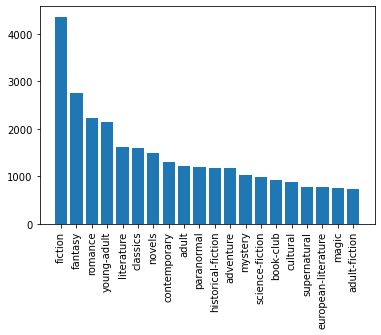

In [76]:
#plot the data here
import matplotlib.pyplot as plt

y = genredf.sum().sort_values(ascending=False)[:20]
x = y.index
plt.bar(x,y)
plt.xticks(rotation=90)
plt.show()